<a href="https://colab.research.google.com/github/rilgilang/Capstone-Project-2/blob/main/Capstone_Project_2_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
Supermarket ABC, established as the first retail supermarket in the city and has been a pioneer in offering wide variety of products, including meat, fruits, wines, fish, and sweet golds. Over time, the supermarket became a go-to destination for the community, setting a benchmark for quality and variety.

However, as years passed, the retail landscape in the city became increasingly competitive with the emergence of new supermarkets. The growing number of competitors has challenged Supermarket ABC's market position, leading to a noticeable decline in their sales performance.

In response to this challenge, the Management has launched numerous marketing campaigns aimed to boost sales and customer engagement. Despite these efforts, the campaigns have not delivered the expected results, prompting the need for a more data-driven approach.

To address this, the Management has hired a data analyst to examine their customer data, collected from 2012 to 2014. This data includes comprehensive details on customer demographics, purchase histories, product offerings, and the various campaigns conducted during this period. The goal is to uncover insights and develop strategies that will enhance Supermarket ABC's competitiveness and drive sales growth in the increasingly crowded market.
# Problem Statement
The management is seeking a deeper understanding of their customer base and the effectiveness of their past marketing efforts. Their primary goals are to evaluate previous campaigns, understand customer segmentation, and identify potential areas for growth and development.

To address these objectives, the following key questions need to be explored:

How do factors such as birth year, marital status, education, and income levels influence the types of products customers purchase and the quantity of their purchases?
What are the most common channels through which customers make their purchases? Are they primarily using the supermarket’s website, visiting physical stores, or ordering through catalogs?
Which products have the highest and lowest sales values? Identifying these can help tailor inventory and marketing strategies.
How effective have the various types of campaigns been in driving product sales? Understanding this will aid in refining future marketing efforts.
Does offering discounts significantly increase the number of customer purchases? Analyzing this can inform pricing and promotional strategies.
What are the common issues raised by customers, and how can these be addressed to improve customer satisfaction and loyalty?
By answering these questions, the data analyst will provide Supermarket ABC's management with actionable insights to enhance their strategic decisions, ultimately aiming to increase sales and customer satisfaction in a competitive market environment.

In [1]:
import pandas as pd


# Read sample data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_customer.csv', sep='\t')

# Display the first few rows of the dataframe (optional)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning


# Handling Data Format

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Change the format string to match the actual format of your dates
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage'],
                     data=listItem)

dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage
0,ID,int64,2240,0,0.00
1,Year_Birth,int64,2240,0,0.00
2,Education,object,2240,0,0.00
3,Marital_Status,object,2240,0,0.00
4,Income,float64,2240,24,1.07
5,Kidhome,int64,2240,0,0.00
6,Teenhome,int64,2240,0,0.00
7,Dt_Customer,datetime64[ns],2240,0,0.00
8,Recency,int64,2240,0,0.00
9,MntWines,int64,2240,0,0.00


# Unique Sample

In [5]:
listItem = []
for col in df.columns :
    listItem.append([df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Number of Unique', 'Unique Sample'],
                     data=listItem)

dfDesc

,Number of Unique,Unique Sample
0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,8,"[Single, Together, Married, Divorced, Widow, A..."
4,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,3,"[0, 1, 2]"
6,3,"[0, 1, 2]"
7,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
8,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


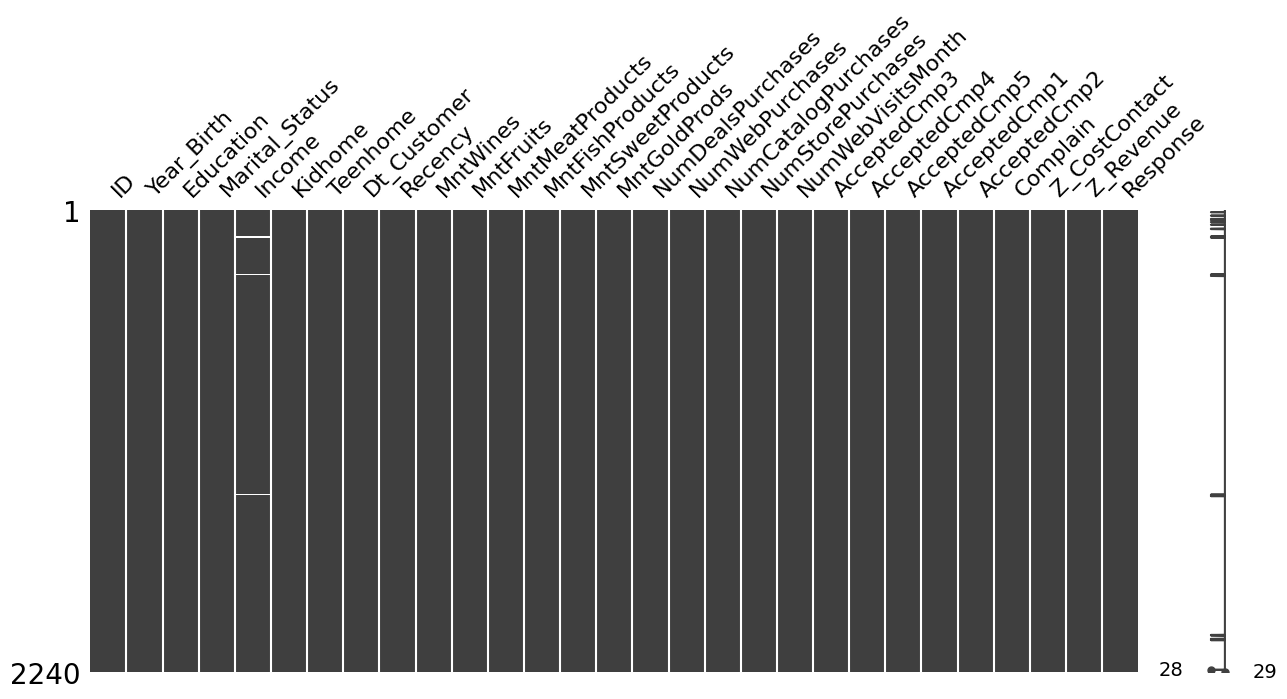

In [6]:
import missingno as msno

# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

# Fill Missing Value

In [7]:
# Calculate the median of the 'Income' column (excluding missing values)
median_income = df['Income'].median()

# Fill missing values in the 'Income' column with the median
df['Income'].fillna(median_income, inplace=True)

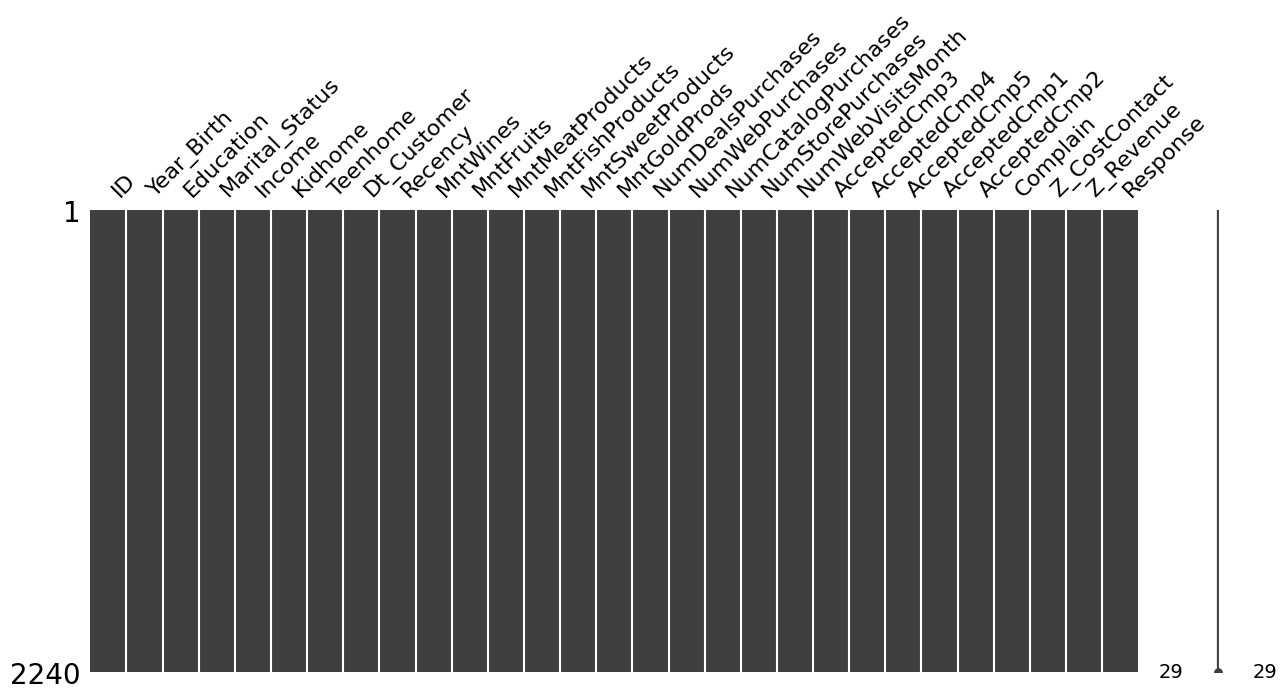

In [8]:
# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

# Check Duplicate

In [9]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
df.drop_duplicates(inplace=True)

# Outlier Checker

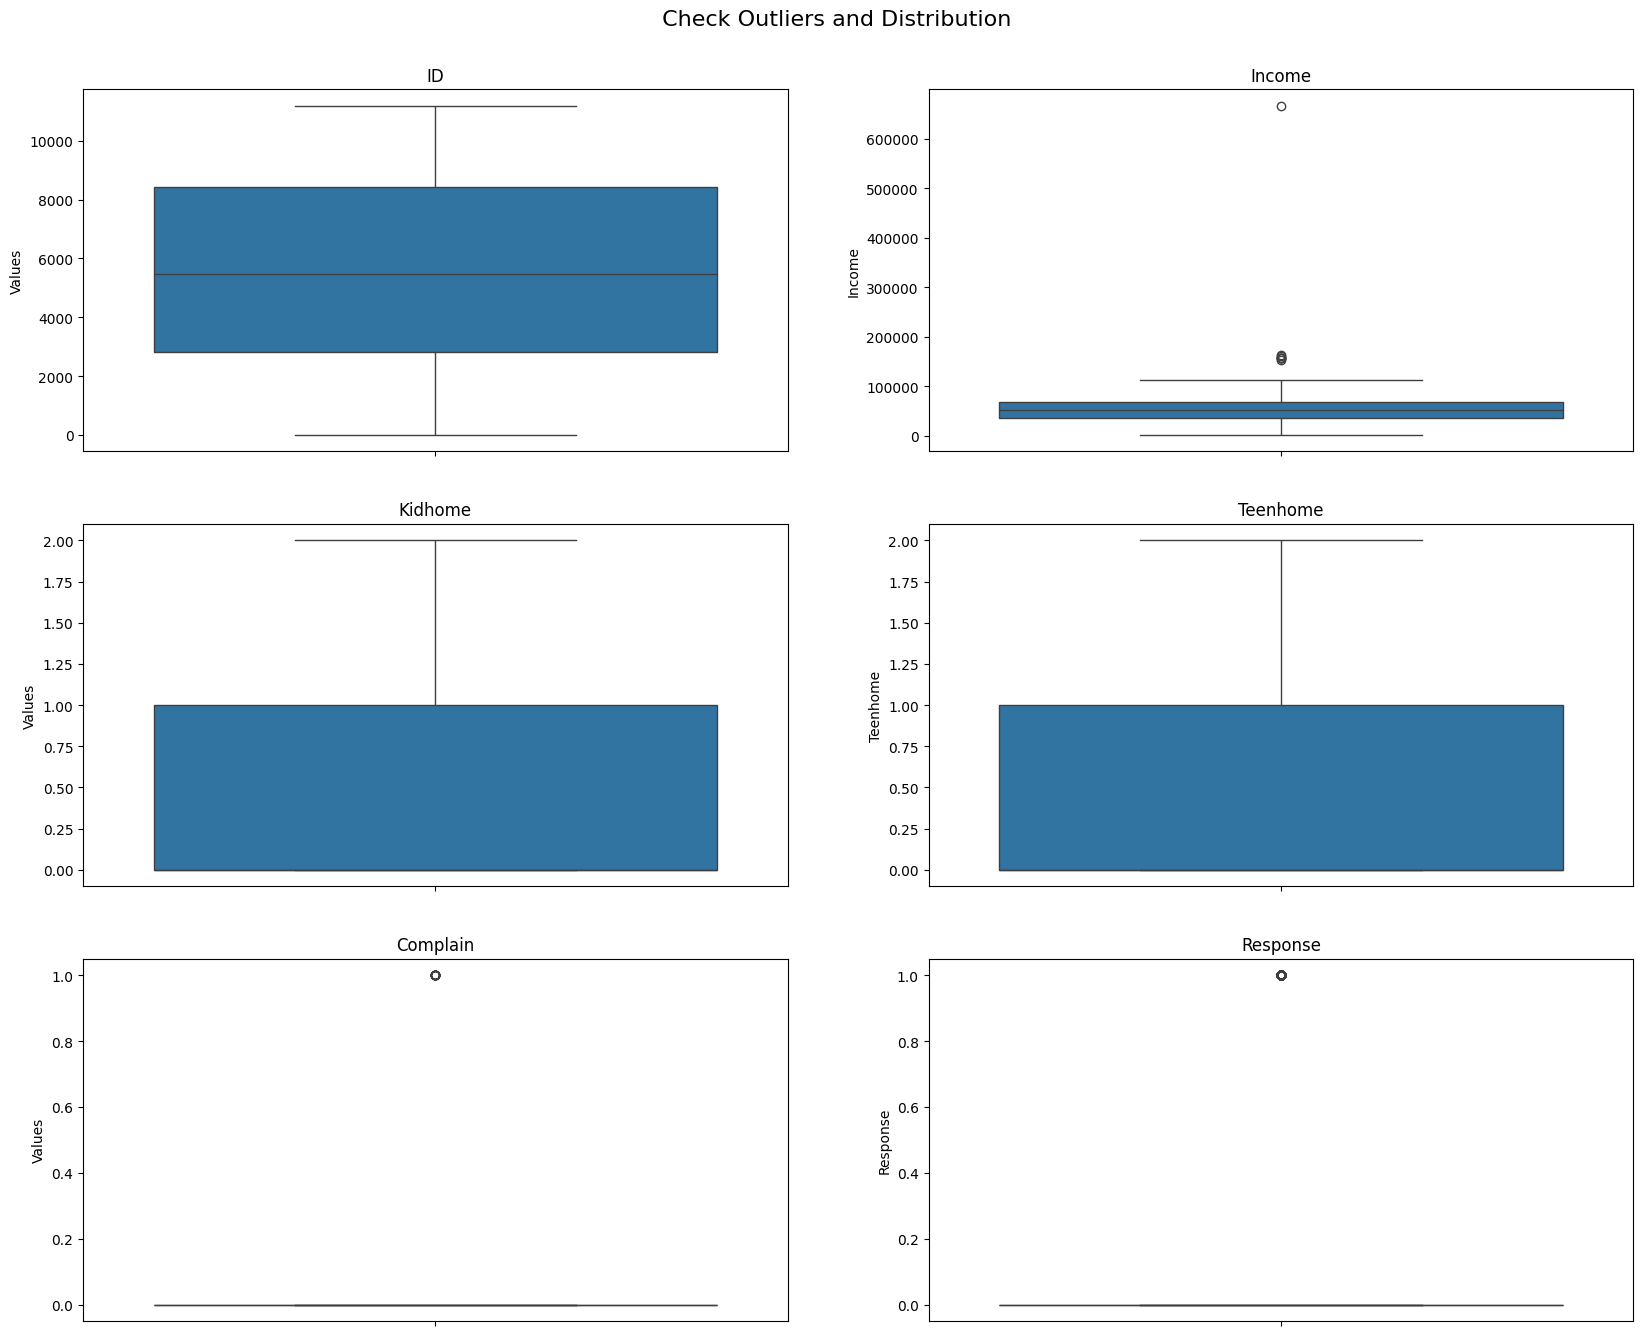

In [11]:
import seaborn as sns # Import the seaborn library

# Select only numeric columns
df_numeric = df.select_dtypes(include='number').columns.tolist()

# Exclude certain columns
excluded_columns = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue']

# Filter df_numeric to exclude the above columns
df_numeric = [col for col in df_numeric if col not in excluded_columns]

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df, columns_list=df_numeric, rows=3, cols=2, suptitle=' Check Outliers and Distribution')

In [12]:
import datetime  # Import the datetime module

# Get the current year
current_year = datetime.datetime.now().year

# Calculate age
df['Age'] = current_year - df['Year_Birth']

# Initialize 'Age_Group' column
df['Age_Group'] = ""

# Assigning age groups based on the given birth year ranges
for i, birth in enumerate(df['Year_Birth']):
    if 1997 <= birth <= 2012:
        df.loc[i, 'Age_Group'] = "Gen Z 12-27"
    elif 1981 <= birth <= 1996:
        df.loc[i, 'Age_Group'] = "Millennials 28-43"
    elif 1965 <= birth <= 1980:
        df.loc[i, 'Age_Group'] = "Gen X 44-59"
    elif 1955 <= birth <= 1964:
        df.loc[i, 'Age_Group'] = "Boomers II 60-69"
    elif 1946 <= birth <= 1954:
        df.loc[i, 'Age_Group'] = "Boomers I 70-78"

# Check the distribution of Age Groups
print(df['Age_Group'].value_counts())

Age_Group
Gen X 44-59          1069
Boomers II 60-69      467
Millennials 28-43     385
Boomers I 70-78       292
                       27
Name: count, dtype: int64


Pada table diatas terdapat pelanggan yang sudah berusia lebih dari 70 Tahun ini merupakan hal yang aneh maka kita perlu drop data tersebut

In [13]:
# Drop outliers according to upper bound
df = df[df['Age'] < 70]

# Data Cleaning

In [14]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ID,int64,1921,0,0.0,1921,"[5524, 4141, 6182, 5324, 7446, 965, 6177, 4855..."
1,Year_Birth,int64,1921,0,0.0,42,"[1957, 1965, 1984, 1981, 1967, 1971, 1985, 197..."
2,Education,object,1921,0,0.0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,1921,0,0.0,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1921,0,0.0,1697,"[58138.0, 71613.0, 26646.0, 58293.0, 62513.0, ..."
5,Kidhome,int64,1921,0,0.0,3,"[0, 1, 2]"
6,Teenhome,int64,1921,0,0.0,3,"[0, 1, 2]"
7,Dt_Customer,datetime64[ns],1921,0,0.0,639,"[2012-09-04 00:00:00, 2013-08-21 00:00:00, 201..."
8,Recency,int64,1921,0,0.0,100,"[58, 26, 94, 16, 34, 32, 19, 11, 59, 82, 38, 5..."
9,MntWines,int64,1921,0,0.0,695,"[635, 426, 11, 173, 520, 235, 76, 14, 5, 6, 19..."


# Renamin Column Name

In [15]:
# Define a dictionary with original column names as keys and readable names as values

rename_dict = {
    'ID': 'Customer_ID',
    'Year_Birth': 'Birth year',
    'Education_Level': 'Education',
    'Marital_Status': 'Relationship status',
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'AcceptedCmp1': 'Campaign_1',
    'AcceptedCmp2': 'Campaign_2',
    'AcceptedCmp3': 'Campaign_3',
    'AcceptedCmp4': 'Campaign_4',
    'AcceptedCmp5': 'Campaign_5',
    'NumDealsPurchases': 'Purchase_with_discounts',
    'NumWebPurchases': 'Web_Purchase',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits',
    'Complain': 'Customer_Complaints',
    'Z_CostContact': 'Cost_of_Contact',
    'Z_Revenue': 'Revenue',
    'Response': 'Overall_Response'
}

# Rename the columns in the DataFrame
df.rename(columns=rename_dict, inplace=True)

# Display the first few rows to verify the changes
df.head()


,Customer_ID,Birth year,Education,Relationship status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,...,Campaign_4,Campaign_5,Campaign_1,Campaign_2,Customer_Complaints,Cost_of_Contact,Revenue,Overall_Response,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,Boomers II 60-69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,Gen X 44-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,Millennials 28-43
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,Millennials 28-43
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,3,11,0,57,Gen X 44-59


In [16]:
# Convert 'Education' to lowercase to ensure consistency

df['Education'] = df['Education'].str.lower()


# Define the mapping
education_mapping = {
    'graduation': 'Undergraduate',
    'school': 'Basic',
    'cycle': 'Postgraduate',
    'phd': 'Postgraduate',
    'master': 'Postgraduate'
}

# Apply the mapping to create a new categorized column
df['Education'] = df['Education'].map(education_mapping)

# Check the result
df['Education']

,Education
0,Undergraduate
2,Undergraduate
3,Undergraduate
4,Postgraduate
5,Postgraduate
...,...
2233,Undergraduate
2234,Undergraduate
2235,Undergraduate
2237,Undergraduate


#Renaming Marital Status

In [17]:
# Convert Relationship status to lowercase to ensure consistency
df.loc[:, 'Relationship status'] = df['Relationship status'].str.lower()

# Define the mapping
status_mapping = {
    'absurd': 'Single',
    'alone': 'Single',
    'divorced': 'Single',
    'single': 'Single',
    'widow': 'Single',
    'solo': 'Single',
    'married': 'In relationship',
    'together': 'In relationship'
}

# Apply the mapping to create a new categorized column
df.loc[:, 'Relationship_Status'] = df['Relationship status'].map(status_mapping)

# Check the result
df['Relationship_Status'].value_counts()


,count
Relationship_Status,
In relationship,1244
Single,675


# Categerized Family Kids and Amount of Customer Purchase

In [18]:
# Check if the required coumns exist
if all(col in df.columns for col in ['Kidhome', 'Teenhome', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']):

    # Create 'Children' column
    df['Children'] = df['Kidhome'] + df['Teenhome']

    # Create 'Total_Purchase' column
    df['Total_Purchase'] = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)

    # Drop 'Number_of_Kids' and 'Number_of_Teens' columns
    df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

    # Display the result
    print(df[['Children', 'Total_Purchase']].head())

df

   Children  Total_Purchase
0         0            1617
2         0             776
3         1              53
4         1             422
5         1             716


,Customer_ID,Birth year,Education,Relationship status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,...,Campaign_2,Customer_Complaints,Cost_of_Contact,Revenue,Overall_Response,Age,Age_Group,Relationship_Status,Children,Total_Purchase
0,5524,1957,Undergraduate,single,58138.0,2012-09-04,58,635,88,546,...,0,0,3,11,1,67,Boomers II 60-69,Single,0,1617
2,4141,1965,Undergraduate,together,71613.0,2013-08-21,26,426,49,127,...,0,0,3,11,0,59,Gen X 44-59,In relationship,0,776
3,6182,1984,Undergraduate,together,26646.0,2014-02-10,26,11,4,20,...,0,0,3,11,0,40,Millennials 28-43,In relationship,1,53
4,5324,1981,Postgraduate,married,58293.0,2014-01-19,94,173,43,118,...,0,0,3,11,0,43,Millennials 28-43,In relationship,1,422
5,7446,1967,Postgraduate,together,62513.0,2013-09-09,16,520,42,98,...,0,0,3,11,0,57,Gen X 44-59,In relationship,1,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,9432,1977,Undergraduate,together,666666.0,2013-06-02,23,9,14,18,...,0,0,3,11,0,47,Gen X 44-59,In relationship,1,62
2234,8372,1974,Undergraduate,married,34421.0,2013-07-01,81,3,3,7,...,0,0,3,11,0,50,Gen X 44-59,In relationship,1,30
2235,10870,1967,Undergraduate,married,61223.0,2013-06-13,46,709,43,182,...,0,0,3,11,0,57,Gen X 44-59,In relationship,1,1341
2237,7270,1981,Undergraduate,divorced,56981.0,2014-01-25,91,908,48,217,...,0,0,3,11,0,43,Millennials 28-43,Single,0,1241


In [19]:
# Sample DataFrame creation (assuming df is already defined)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if reading from a file

# Define income bins and labels
bins = [1730, 35694, 51650, 68277.5, 162397]
labels = ['Low', 'Middle', 'High', 'Very High']

# Create the 'Income_Category' column based on the defined bins
df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Display the result
print(df[['Income', 'Income_Category']].head())

    Income Income_Category
0  58138.0            High
2  71613.0       Very High
3  26646.0             Low
4  58293.0            High
5  62513.0            High


# Data Visualization

# General Data


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 0 to 2238
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              1921 non-null   int64         
 1   Birth year               1921 non-null   int64         
 2   Education                1680 non-null   object        
 3   Relationship status      1921 non-null   object        
 4   Income                   1921 non-null   float64       
 5   Dt_Customer              1921 non-null   datetime64[ns]
 6   Last_Purchase            1921 non-null   int64         
 7   Wines                    1921 non-null   int64         
 8   Fruits                   1921 non-null   int64         
 9   Meat                     1921 non-null   int64         
 10  Fish                     1921 non-null   int64         
 11  Sweet                    1921 non-null   int64         
 12  Gold                     1921 non-null 

# Distribution of Age, Income, and Marital Status Affecting Purchase Patterns


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 33)


ValueError: `dataset` input should have multiple elements.

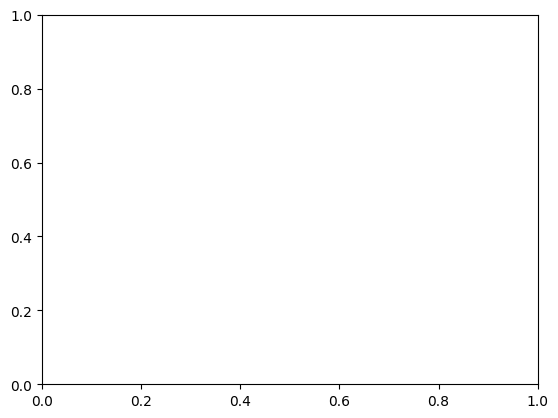

In [38]:
df_filtered = df[(df['Age'] >= 1940) & (df['Age'] <= current_year)]

# Print the shape of the filtered DataFrame to check if it's empty
print(df_filtered.shape)

# Age Distribution vs. Total Purchase
sns.histplot(data=df_filtered, x='Age', hue='Total_Purchase', kde=True)
plt.title('Age Distribution vs. Total Purchase')
plt.show()

# Income Distribution vs. Total Purchase
sns.histplot(data=df_filtered, x='Annual_Income', hue='Total_Purchase', kde=True)
plt.title('Income Distribution vs. Total Purchase')
plt.show()

# Relationship Status vs. Total Purchase
sns.boxplot(data=df_filtered, x='Relationship_Status', y='Total_Purchase')
plt.title('Relationship Status vs. Total Purchase')
plt.show()

# Influence of Age, Income, Relationship Status, and Number of Children on Product Categories Purchased


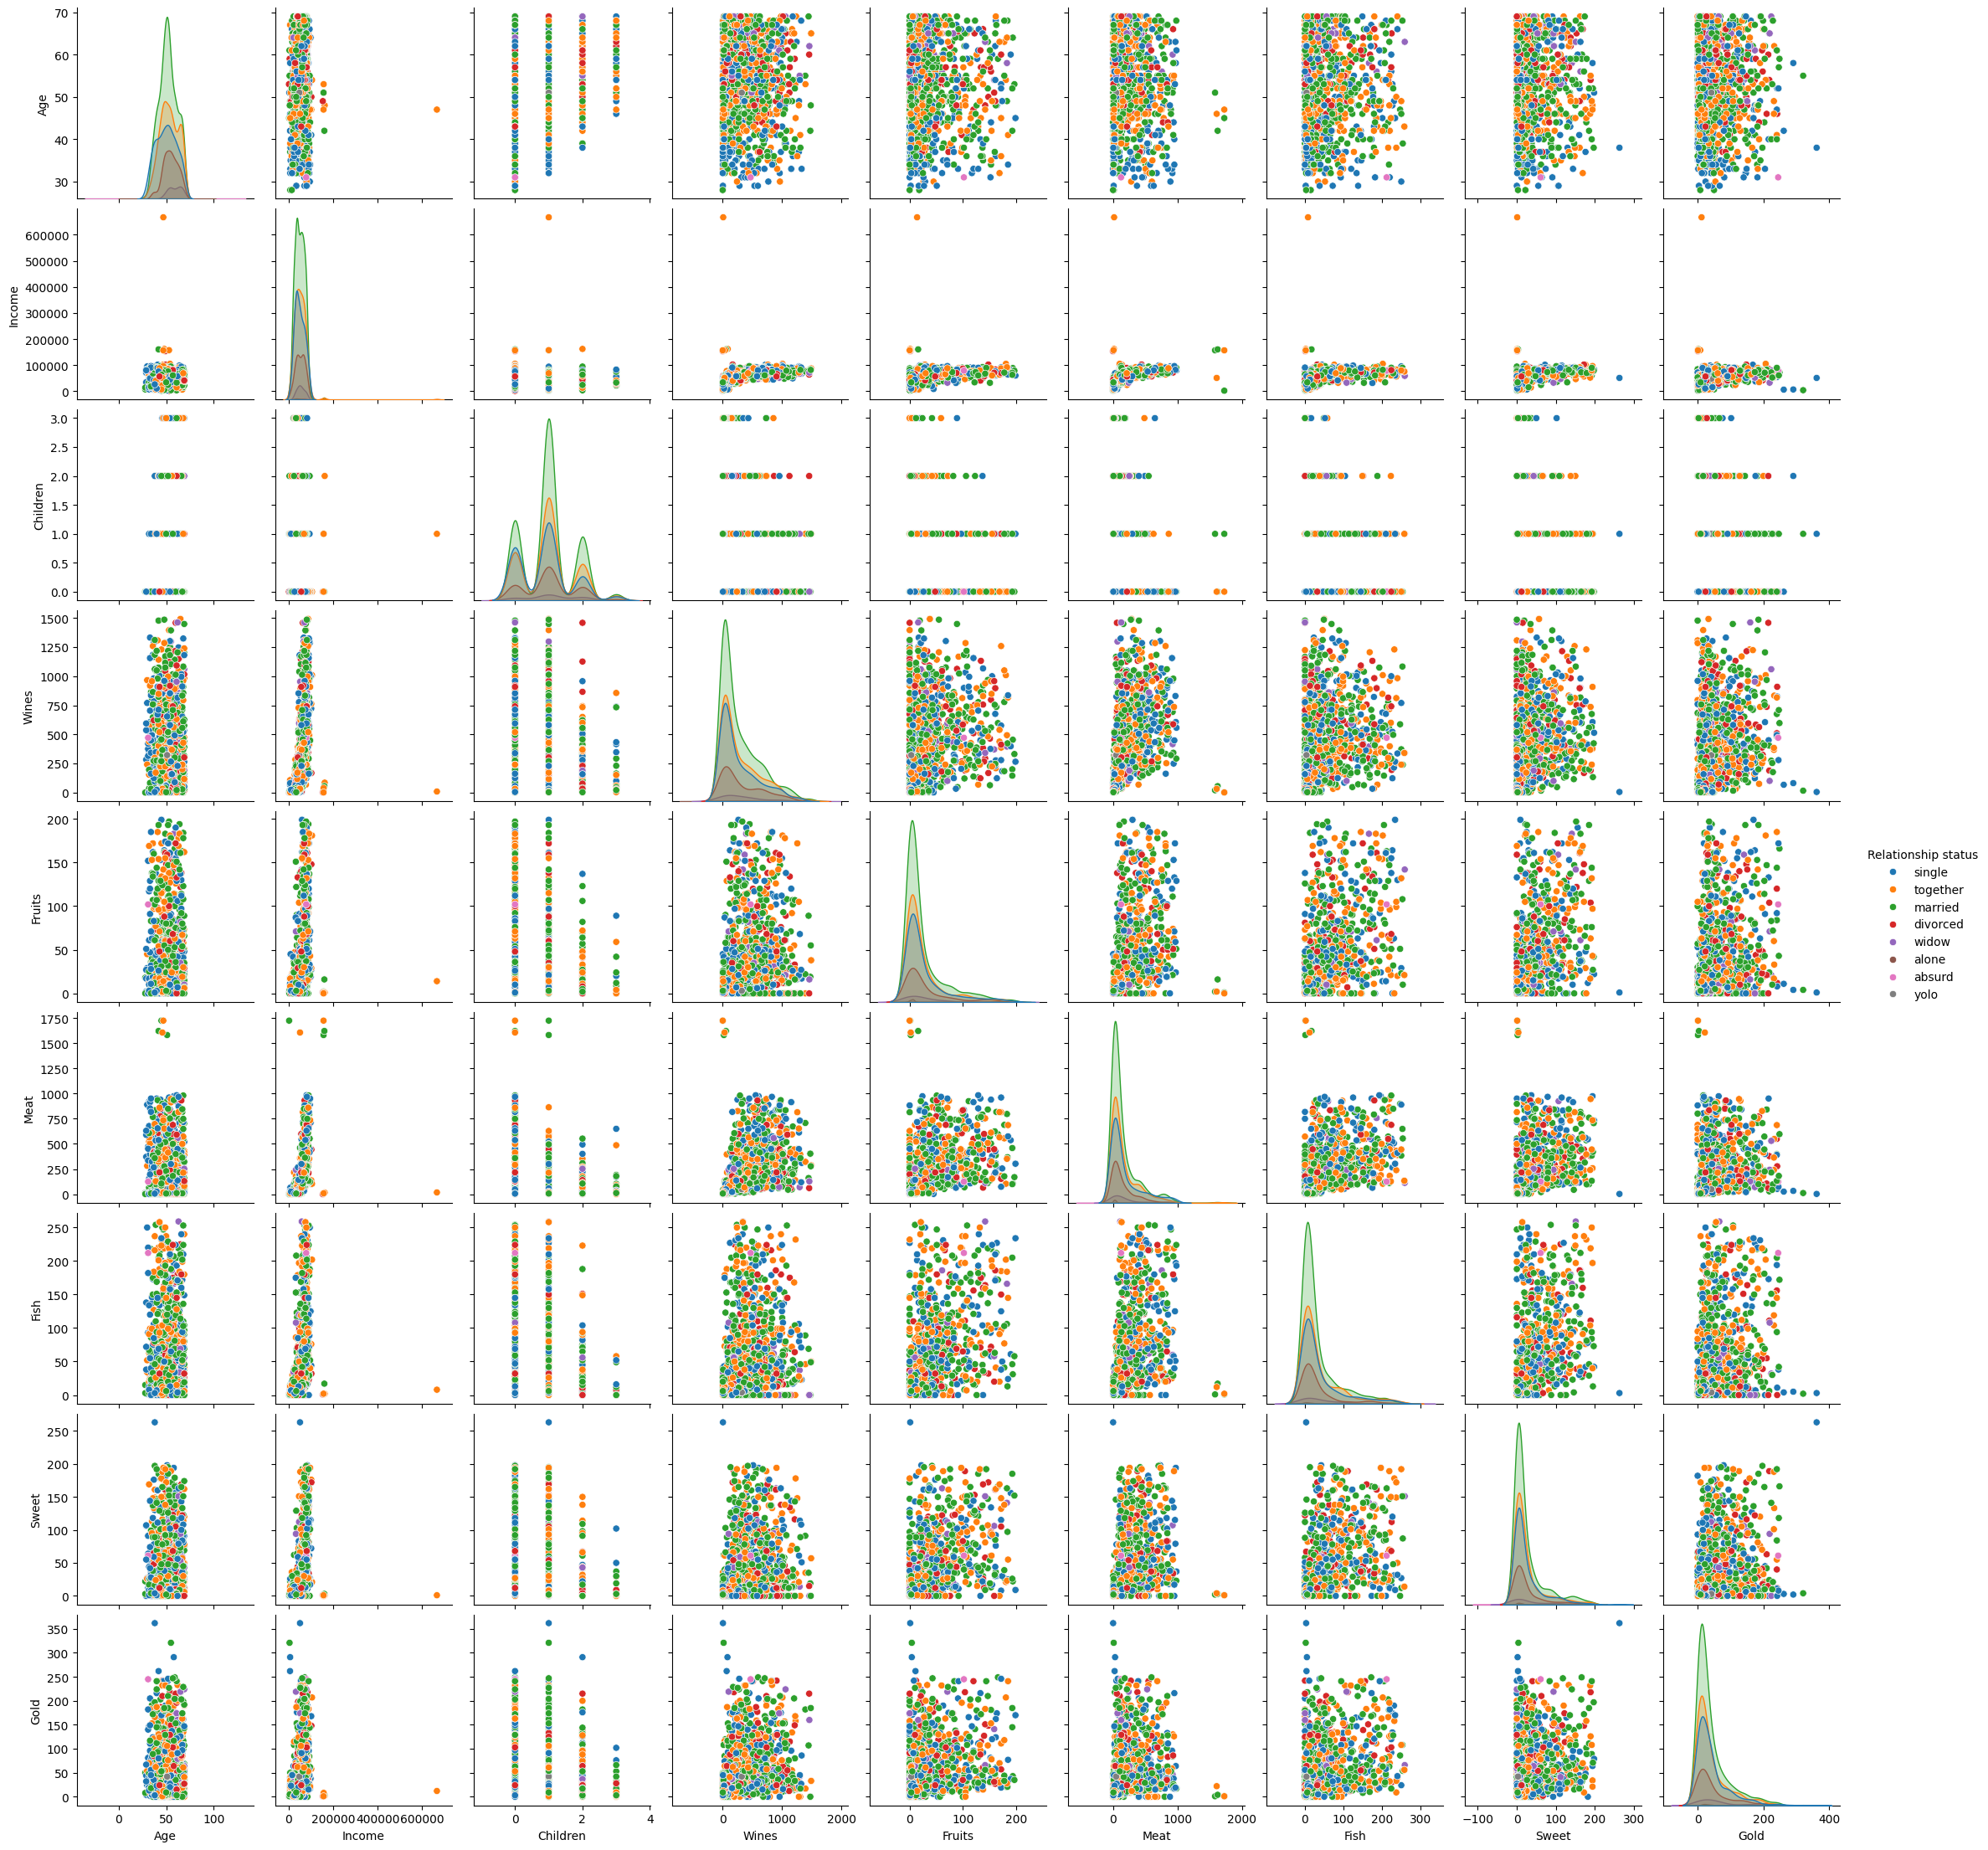

In [23]:
# Pairplot to visualize relationships between Age, Income, Children, and Product Categories
product_columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
sns.pairplot(df, vars=['Age', 'Income', 'Children'] + product_columns, hue='Relationship status')
plt.show()


# Influence of Age, Income, Relationship Status, and Number of Children on Product Categories Purchased

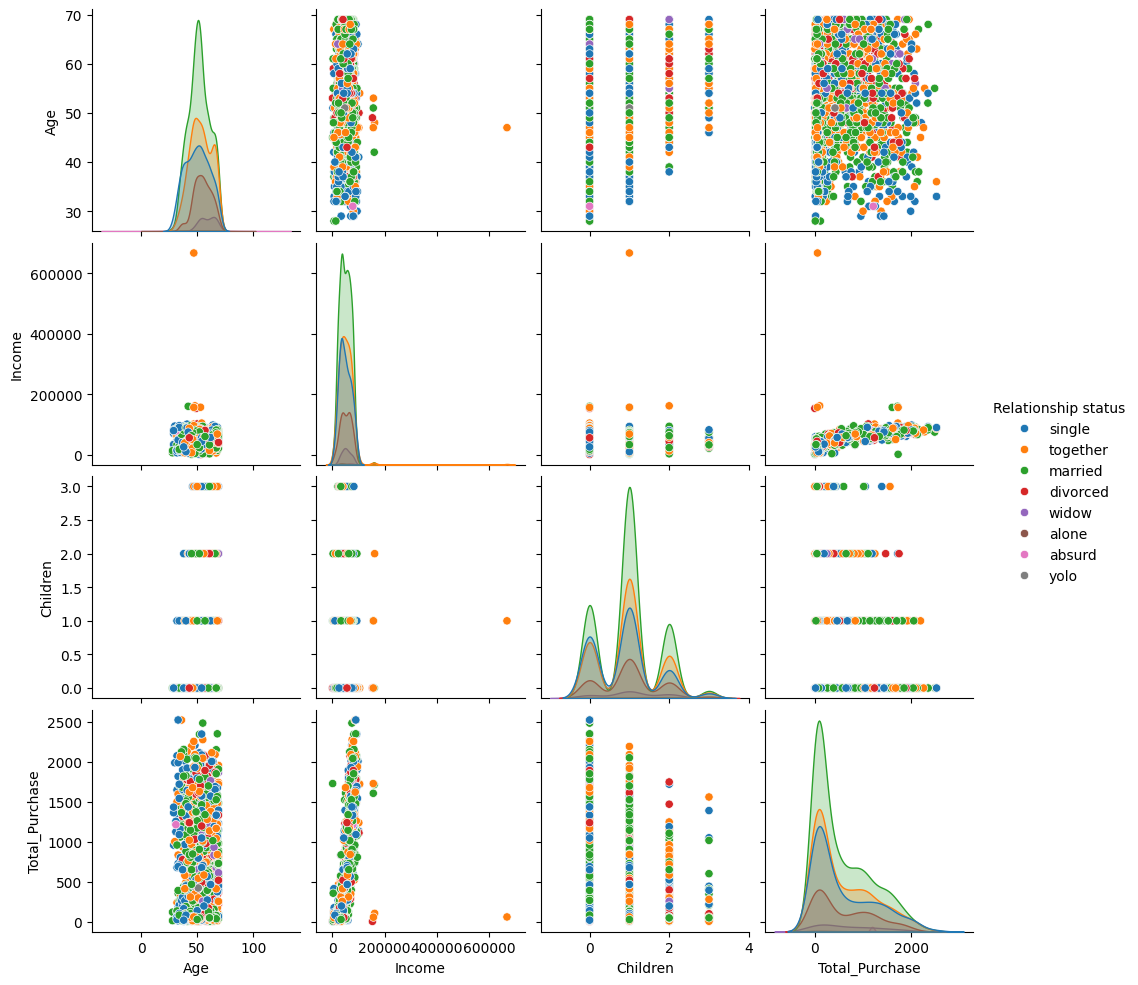

In [24]:
# Scatterplot matrix to see the influence of Age, Income, Relationship Status, and Number of Children on Total Purchase
sns.pairplot(df, vars=['Age', 'Income', 'Children', 'Total_Purchase'], hue='Relationship status')
plt.show()

# Commonly Purchased Products Together and How to Use This to Increase Sales


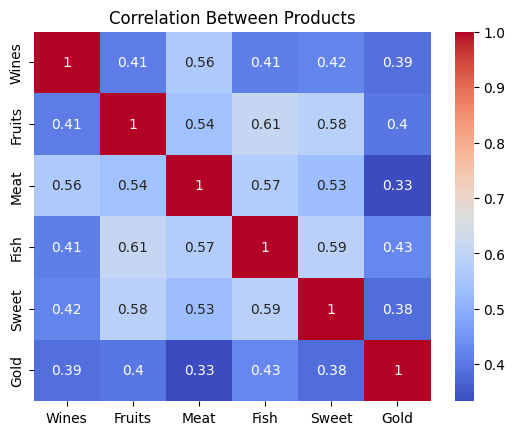

In [25]:
# Correlation matrix for products to find products that are often purchased together
corr = df[product_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Products')
plt.show()

# Products with the Highest and Lowest Sales Rate

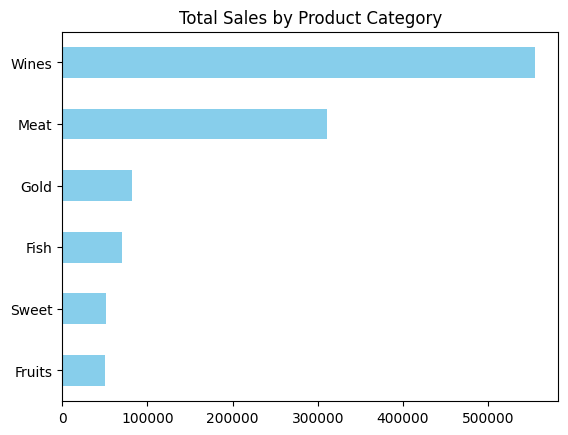

In [26]:
# Bar plot for total sales of each product category
total_sales = df[product_columns].sum()
total_sales.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.show()

#  Effectiveness of Each Campaign on Product Category Revenue

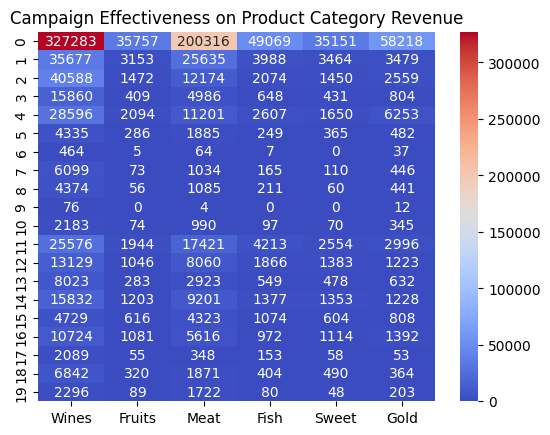

In [29]:
# Assuming df_campaign is already defined as shown in your code
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']
df_campaign = df[campaign_columns + product_columns]

# Calculate campaign effectiveness
campaign_effectiveness = df_campaign.groupby(campaign_columns).sum().reset_index()

# Plot the heatmap with formatted annotations
sns.heatmap(campaign_effectiveness[product_columns], annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Campaign Effectiveness on Product Category Revenue')
plt.show()

# Proposi status pernikahan pelanggan



In [ ]:
# Assuming 'df' is your DataFrame
df.to_csv('capstone_project_2.csv', index=False)
df.to_excel('capstone_project_2.xlsx', index=False)
